# Exercise 2: Hypothesis testing

In this exercise we will test if 10 different measurements of the same quantity are well-described by a single average value or not. 

In the lab ten nominally identical samples of superconducting material are made and tested using the same procedure. Due to factors that are not under control in the experiment it could be that slightly different materials are being produced. 

For each sample of superconducting material the critical temperature $T_c$ is determined using the same setup and same criterion to identify the transition. The uncertainty in the transition temperature introduced by this method is $\pm$ 0.2 K.

The transition temperature for the 10 samples is found to be:

In [2]:
import numpy as np
Tc=np.array([10.2, 10.4, 9.8, 10.5, 9.9, 9.8, 10.3, 10.1, 10.3, 9.9])

## Plot the data

It is always a good idea to plot the data before you start any calculation

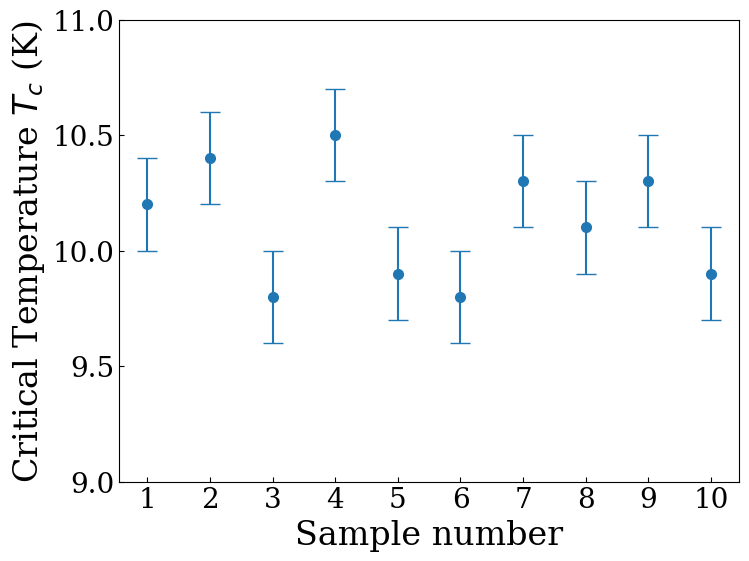

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Some default styling for the figures; best solution is once at the beginning of the code
# See https://matplotlib.org/3.1.3/tutorials/introductory/customizing.html
# These settings assume that you have used import matplotlib.pyplot as plt 

# Smallest font size is a 10 point font for a 4 inch wide figure. 
# font sizes and figure size are scaled by a factor 2 to have a large figure on the screen

SMALL_SIZE = 10*2                                        
MEDIUM_SIZE = 12*2
BIGGER_SIZE = 14*2

plt.rc('font', size=SMALL_SIZE, family='serif')          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)                     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)                    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE, direction='in')    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)                    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)                  # fontsize of the figure title
plt.rc('figure', figsize='8, 6')                         # size of the figure, used to be '4, 3' in inches

# data
x = np.arange(1, 11, 1)
err=np.full((10),0.2)

plt.figure()
plt.errorbar(x, Tc, yerr=err, ls='None', marker='o', markersize=7, capsize=7)
plt.xticks(x) # Simply put a label for each sample
plt.xlabel('Sample number')
plt.yticks((9.0,9.5,10.0,10.5,11.0))
plt.ylabel('Critical Temperature $T_c$ (K)')
plt.ylim(9,11)
plt.show()

According to the hypothesis it is suggested that all measurements of $T_c$ correspond to the same true value with the differences between measurement explained by measurement errors.

### a) Calculate the average value of $T_c$ and the error bar

Tc = 10.12 ± 0.06


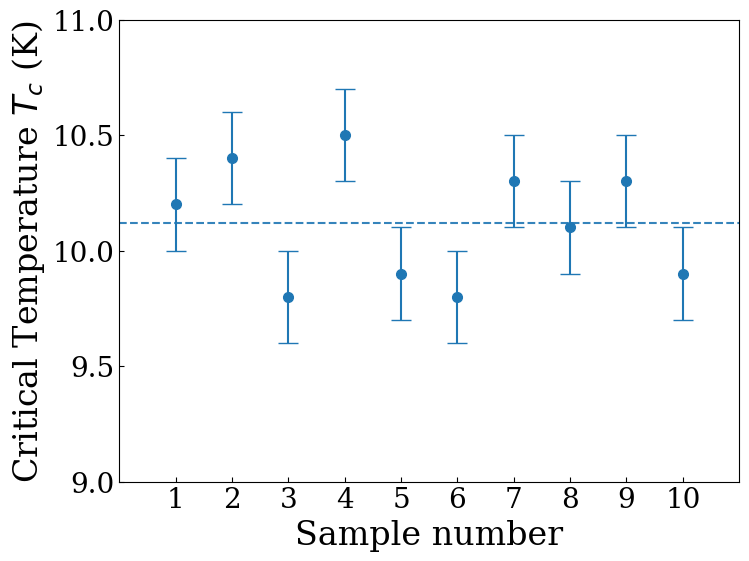

In [37]:
average = np.average(Tc, weights=1/(err**2))
std_mean = np.sqrt(1 / np.sum(1 / (err**2)))

print(f"Tc = {average:.2f} ± {std_mean:.2f}")

plt.figure()
plt.errorbar(x, Tc, yerr=err, ls='None', marker='o', markersize=7, capsize=7)
plt.hlines(average, 0, 11, colors='tab:blue', ls='dashed', alpha=0.9)
plt.xticks(x) # Simply put a label for each sample
plt.xlabel('Sample number')
plt.yticks((9.0,9.5,10.0,10.5,11.0))
plt.ylabel('Critical Temperature $T_c$ (K)')
plt.ylim(9,11)
plt.xlim(0,11)
plt.show()


This value minimizes the least squares defined by

$$\chi^2 = \sum_i (y_i - \bar{y})^2$$

and is thus by definition the best fit to the data. 

### b) Calculate this minimum value of $\chi^2$

In [ ]:
def chi_squared(y, y_expectation, sigma_y):
    return np.sum((y - y_expectation) ** 2 / (sigma_y **2))

# Not ran since change

In [ ]:
chi2_average = chi_squared(Tc, average, 0.2) # not ran since change

print(f"The chi2 for the average is {chi2_average}")

The chi2 for the average is 0.5959999999999994


### c) Determine the number of degrees of freedom

In [12]:
def dof(y):
    return len(y) - 1

print(f"This dataset has {dof(Tc)} degrees of freedom")

This dataset has 9 degrees of freedom


### d) Given the value of $\chi^2$, do you believe that the samples are indeed identical? 

Hint: calculate the probability that you find a value of $\chi^2$ smaller or equal than the value obtained in b) by taking into account the error bar on the measurement and the number of degrees of freedom.

In [23]:
from scipy.stats import chi2

chance_lower = chi2.cdf(chi2_average, dof(Tc))
# sf = chi2.sf(chi2_average, dof(Tc))

print(chance_lower)
# print(sf)

6.451732732565826e-05


It is therefore very likely to be correct.